In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
birddata = pd.read_csv('./birds_info/bird_tracking.csv')

In [2]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   altitude            61920 non-null  int64  
 1   date_time           61920 non-null  object 
 2   device_info_serial  61920 non-null  int64  
 3   direction           61477 non-null  float64
 4   latitude            61920 non-null  float64
 5   longitude           61920 non-null  float64
 6   speed_2d            61477 non-null  float64
 7   bird_name           61920 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


In [3]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <BarContainer object of 10 artists>)

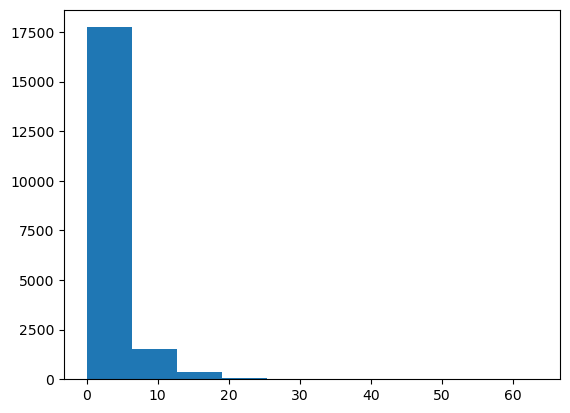

In [4]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
# error
#empy values in the array
plt.hist(speed)

In [5]:
speed[:10]

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
5    2.904772
6    3.080584
7    2.199659
8    2.640076
9    4.592211
Name: speed_2d, dtype: float64

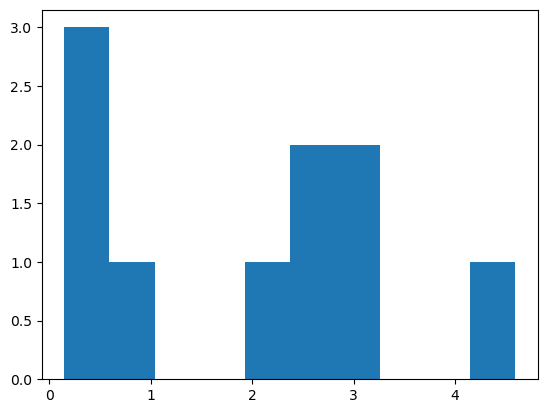

In [6]:
plt.hist(speed[:10]);
plt.show()

In [7]:
np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [8]:
np.isnan(speed).any()

True

In [9]:
#find how many nans are in the array
np.sum(np.isnan(speed))

85

In [10]:
#find the nans
ind = np.isnan(speed)

In [11]:
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [12]:
#take the bitwise complement of the int array which turns each occurence of true to a false and vise versa
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

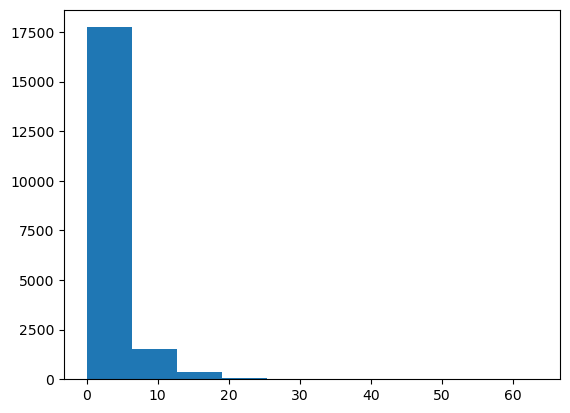

In [13]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind]);
plt.savefig('birds_info/hist.pdf')
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

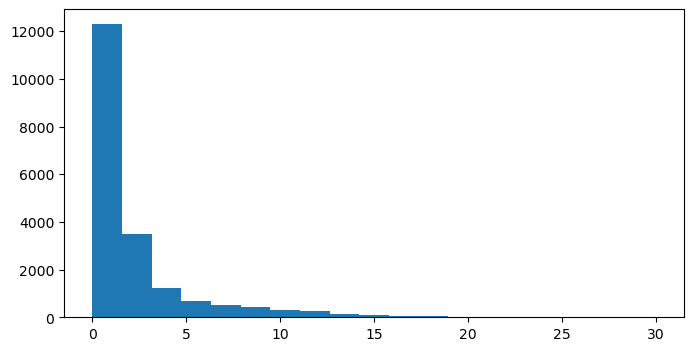

In [14]:
plt.figure(figsize=(8,4))
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
int = np.isnan(speed)
plt.hist(speed[~int], bins = np.linspace(0, 30, 20), normed = True)
plt.xlabel('2D speed (m/s)')
plt.ylabel('Frequency')
plt.savefig('birds_info/hist_2.pdf')
plt.show()

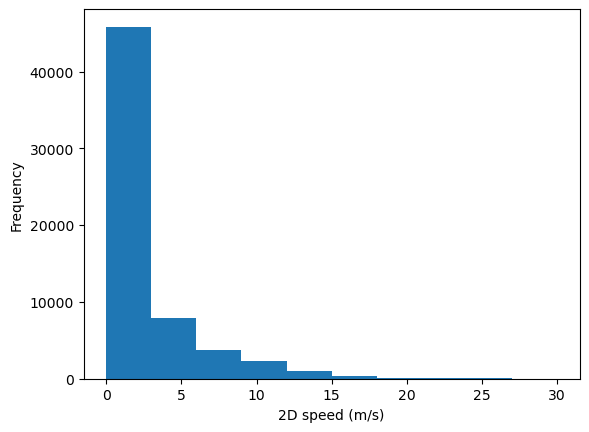

In [15]:
#make histogram using pandas

birddata.speed_2d.plot(kind = 'hist', range = [0, 30])
plt.xlabel('2D speed (m/s)')
plt.savefig('birds_info/pd_hist.pdf')
plt.show()

#### Q1: Examining Flight Speed

Which ```numpy``` method returns True for values that are not numericals?

1. ```np.notnum```
2. ```np.isna```
3. **```np.isnan```**
4. ```np.is_nan```